In [42]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from halp.undirected_hypergraph import UndirectedHypergraph
from halp.utilities import undirected_graph_transformations, undirected_matrices
import community

In [3]:
from networkx.algorithms import bipartite
g  = nx.Graph()
g.add_nodes_from(['a', 'b', 'c','d','e'], bipartite = 1)
g.add_nodes_from(list(range(6, 137)), bipartite = 0)
mapped = ['a', 'b', 'c','d','e']

In [4]:
with open("../data/brunson_revolution/out.brunson_revolution_revolution", 'rt') as f:
    lines = [line.rstrip(' \n') for line in f] 

In [5]:
edges = []

for entry in lines:
    node_2 = mapped[int(entry[-1]) - 1]
    node_1 = int(entry[:-2])
    edges.append((node_1, node_2))

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


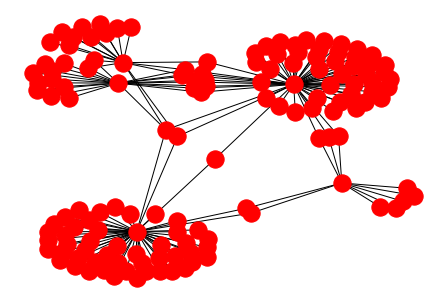

In [6]:
g.add_edges_from(edges)

nx.draw(g)

In [7]:
bottom_nodes, top_nodes = bipartite.sets(g)

In [18]:
I = bipartite.biadjacency_matrix(g, row_order = list(range(6, 137)), column_order= ["a", "b", "c", "d", "e"]).toarray()[:100]

In [19]:
# read biadjacency matrix to hypergraph
H = undirected_hypergraph.UndirectedHypergraph()
H.add_nodes(list(range(0, 100)))

for col in range(len(I[0])):
    # iterating through the hyperedges
    # find the non-zero elements => nodes in the hyperedge
    nodes_in_h_edge = list(np.nonzero(I[:,col])[0])
    if len(nodes_in_h_edge) == 0:
        pass
    else:
        H.add_hyperedge(nodes_in_h_edge)

In [20]:
G = undirected_graph_transformations.to_graph_decomposition(H)

In [21]:
A = test.dot(test.T)
A = A - np.diag(np.diag(A))

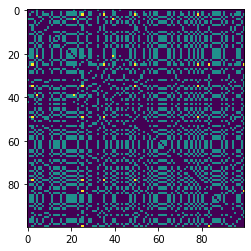

In [26]:
# hyper-Adjacency matrix 

plt.imshow(A)

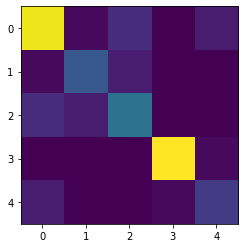

In [25]:
# Hyperedges Matrix
C = I.T.dot(I)

plt.imshow(C)

$$
A^{hyp} = H(D_e - 1)^{-1}H
$$

In [27]:
D_e = np.diag(np.diag(C))

In [29]:
A_h = I @ np.linalg.inv(D_e - 1) @ I.T

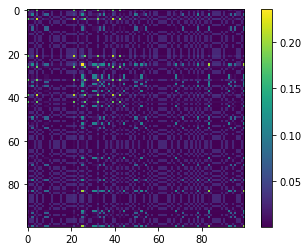

In [31]:
plt.imshow(A_h)
plt.colorbar()

In [37]:
# find sum of all degrees
deg_sum =0
degree_list = []
for node in H.get_node_set():
    deg_sum += len(H.get_star(node))
    degree_list.append(len(H.get_star(node)))

In [38]:
deg_sum

112

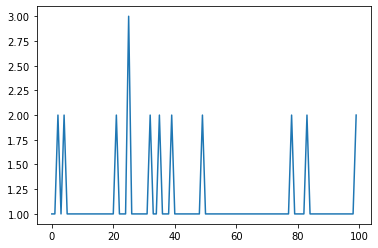

In [39]:
plt.plot(degree_list)

In [41]:
P_h = np.zeros((len(H.get_node_set()), len(H.get_node_set())))

for i in range(len(H.get_node_set())):
    for j in range(len(H.get_node_set())):
        P_h[i,j] = degree_list[i]*degree_list[j] / deg_sum

In [43]:
nx_graph = nx.from_numpy_matrix(A)

In [45]:
community.best_partition(nx_graph)

{0: 0,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 2,
 10: 1,
 11: 0,
 12: 1,
 13: 1,
 14: 1,
 15: 0,
 16: 1,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 1,
 24: 0,
 25: 2,
 26: 0,
 27: 1,
 28: 0,
 29: 0,
 30: 2,
 31: 2,
 32: 1,
 33: 2,
 34: 2,
 35: 0,
 36: 1,
 37: 2,
 38: 1,
 39: 0,
 40: 0,
 41: 1,
 42: 0,
 43: 1,
 44: 2,
 45: 1,
 46: 1,
 47: 0,
 48: 1,
 49: 0,
 50: 2,
 51: 1,
 52: 2,
 53: 0,
 54: 2,
 55: 1,
 56: 0,
 57: 1,
 58: 0,
 59: 0,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 0,
 65: 0,
 66: 1,
 67: 0,
 68: 2,
 69: 1,
 70: 0,
 71: 2,
 72: 1,
 73: 1,
 74: 0,
 75: 1,
 76: 0,
 77: 1,
 78: 0,
 79: 1,
 80: 0,
 81: 1,
 82: 1,
 83: 2,
 84: 1,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 1,
 90: 0,
 91: 1,
 92: 2,
 93: 2,
 94: 1,
 95: 2,
 96: 0,
 97: 0,
 98: 1,
 99: 2}